# Multivariate Analysis: Customer Personality Analysis

Flora He

## Introduction

Understanding customer behavior is crucial for targeted marketing, and analyzing dimensionality and predictors may help refine marketing strategies. This dataset includes information on customer information, product information, promotion information, and purchase methods. It is provided by Dr. Omar Romero-Hernandez. 

Data Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

This project aims to understand customer behavior through multivariate analysis of demographic, spending, and campaign engagement data. Key objectives include exploring the intrinsic dimensionality of the data, identifying key drivers of purchasing behavior, exploring purchase channel habits, and assessing customer clustering. 

In [175]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# !pip install gower
import gower
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [84]:
# Load data
data = pd.read_csv("marketing_campaign.csv", sep = "\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Exploration

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### The dataset contains 2240 rows and 29 columns. The 28 features can be divided into 4 categoris: 

**People**: 
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**:

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**:
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**:

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

Moreover, we can see that `Income` has 4 NULL values, we will drop these rows.

## Data Cleaning

In [93]:
# Convert Dt_Customer to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Compute Enrollment in days since enrollment date
reference_date = pd.to_datetime("2023-12-31")
data['Enrollment'] = (reference_date - data['Dt_Customer']).dt.days

# Compute Age
data['Age'] = 2023 - data['Year_Birth']

# Compute Total_Spending
data['Total_Spending'] = (
    data['MntWines'] + data['MntFruits'] +
    data['MntMeatProducts'] + data['MntFishProducts'] +
    data['MntSweetProducts'] + data['MntGoldProds']
)

# Compute Total_Purchases
data['Total_Purchases'] = (
    data['NumDealsPurchases'] + data['NumWebPurchases'] +
    data['NumCatalogPurchases'] + data['NumStorePurchases']
)

# Assign Living_Status
data['Living_Status'] = data['Marital_Status'].apply(
    lambda x: 'Partner' if x in ['Married', 'Together'] else 'Alone'
)

# Compute Family_Size
data['Family_Size'] = (
    1 + (data['Living_Status'] == 'Partner').astype(int) +
    data['Kidhome'] + data['Teenhome']
)

# Compute Accepted campaigns
data['Accepted'] = (
    data['AcceptedCmp1'] + data['AcceptedCmp2'] +
    data['AcceptedCmp3'] + data['AcceptedCmp4'] +
    data['AcceptedCmp5'] + data['Response']
)

# Drop unwanted columns
columns_to_drop = [
    'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Marital_Status',
    'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome', 'Teenhome'
]

df_cleaned = data.drop(columns=columns_to_drop)

# remove rows/customers with NULL values for the feature Income
df_cleaned = df_cleaned.dropna().copy()
df_cleaned

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,Complain,Response,Enrollment,Age,Total_Spending,Total_Purchases,Living_Status,Family_Size,Accepted
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,...,7,0,1,4135,66,1617,25,Alone,1,1
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,...,5,0,0,3585,69,27,6,Alone,3,0
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,...,4,0,0,3784,58,776,21,Partner,2,0
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,...,6,0,0,3611,39,53,8,Partner,3,0
4,5324,PhD,58293.0,94,173,43,118,46,27,15,...,5,0,0,3633,42,422,19,Partner,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,61223.0,46,709,43,182,42,118,247,...,5,0,0,3853,56,1341,18,Partner,3,0
2236,4001,PhD,64014.0,56,406,0,30,0,0,8,...,7,0,0,3491,77,444,22,Partner,5,1
2237,7270,Graduation,56981.0,91,908,48,217,32,12,24,...,6,0,0,3627,42,1241,19,Alone,1,1
2238,8235,Master,69245.0,8,428,30,214,80,30,61,...,3,0,0,3628,67,843,23,Partner,3,0


#### After doing data exploration and cleaning, we can move on to analysis. 

## Problem Statement

1. What is the intrinsic dimensionality of the data? Can the variance in the dataset be captured by a small number of linear combinations of the original variables? 

2. Which demographic/personality traits predict purchasing behavior? 

3. Do purchase channels (web, catalog, store) influence spending habits? 

4. Can customers be segmented into meaningful groups?

## Data Analysis

### PCA

First, we conduct PCA (Principal Component Analysis) to reduce data dimension and explore the dimensionality of the data. In other words, we will explore whether the variance in this dataset can be explained by a few combinations of the variables. PCA was chosen to explore the intrinsic dimensionality here because this method reduces high-dimensional data into fewer components while retaining maximal variance. This makes it ideal for identifying underlying patterns and simplifying complex datasets. We start with one-hot encoding to turn categorical variables into numeric ones and then scale the data. After these steps, we can conduct PCA: 

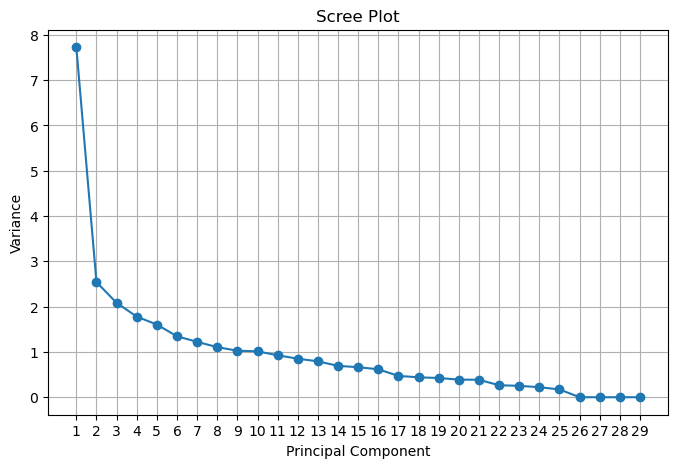

In [100]:
# One-hot encoding for categorical variables
categorical_vars = df_cleaned.select_dtypes(include=['object', 'category']).columns
data_encoded = pd.get_dummies(df_cleaned, columns=categorical_vars, drop_first=False)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

# PCA
pca = PCA()
data_pcacor = pca.fit(scaled_data)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Variance")
plt.title("Scree Plot")
plt.xticks(ticks=range(1, scaled_data.shape[1]+1))
plt.grid(True)
plt.show()

In [ ]:
# Compute standard deviations, proportion of variance, and cumulative variance
sdev = np.sqrt(pca.explained_variance_)
var_explained = pca.explained_variance_
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)

# Create summary table
pca_summary_tbl = pd.DataFrame({
    "Standard Deviation": sdev,
    "Proportion of Variance": prop_var,
    "Cumulative Proportion": cum_var
}).T

# Keep only first 10 principal components
pca_summary_tbl_trimmed = pca_summary_tbl.iloc[:, :10]
pca_summary_tbl_trimmed.columns = [f"PC{i+1}" for i in range(pca_summary_tbl_trimmed.shape[1])]

# Display table
pca_summary_tbl_trimmed

From the PCA summary table, we can see that we need at least **9 PCs** to explain **70%** of the variance in data. This aligns with the scree plot since it doesn't show a useful "elbow" that can point to a obvious separate point that could account for the majority of variance in the data. These results together indicate that the variance in this dataset **cannot be captured** by a small number of linear combinations of the original variables. The high intrinsic dimensionality in this dataset suggests that it is complex and **cannot be simplified** into a small set of linear components.

### Random Forest

Having established the dataset’s complexity, we next identify key predictors using Random Forest. We will do feature selection to determine which attributes are influential to customer behaviors. We will apply Random Forest, which is a relatively stable classifier that utilizes bootstrapping on the data. It allows us to do feature selection and to identify key predictors of customer purchasing behavior. Moreover, since Random Forest can work directly with categorical data, we can use the original cleaned data (without one-hot encoding for categorical features) to proceed. We will train Random Forest models to predict Total Purchases and Total Spending, and then analyze feature importance using %IncMSE (Percent Increase in Mean Squared Error).

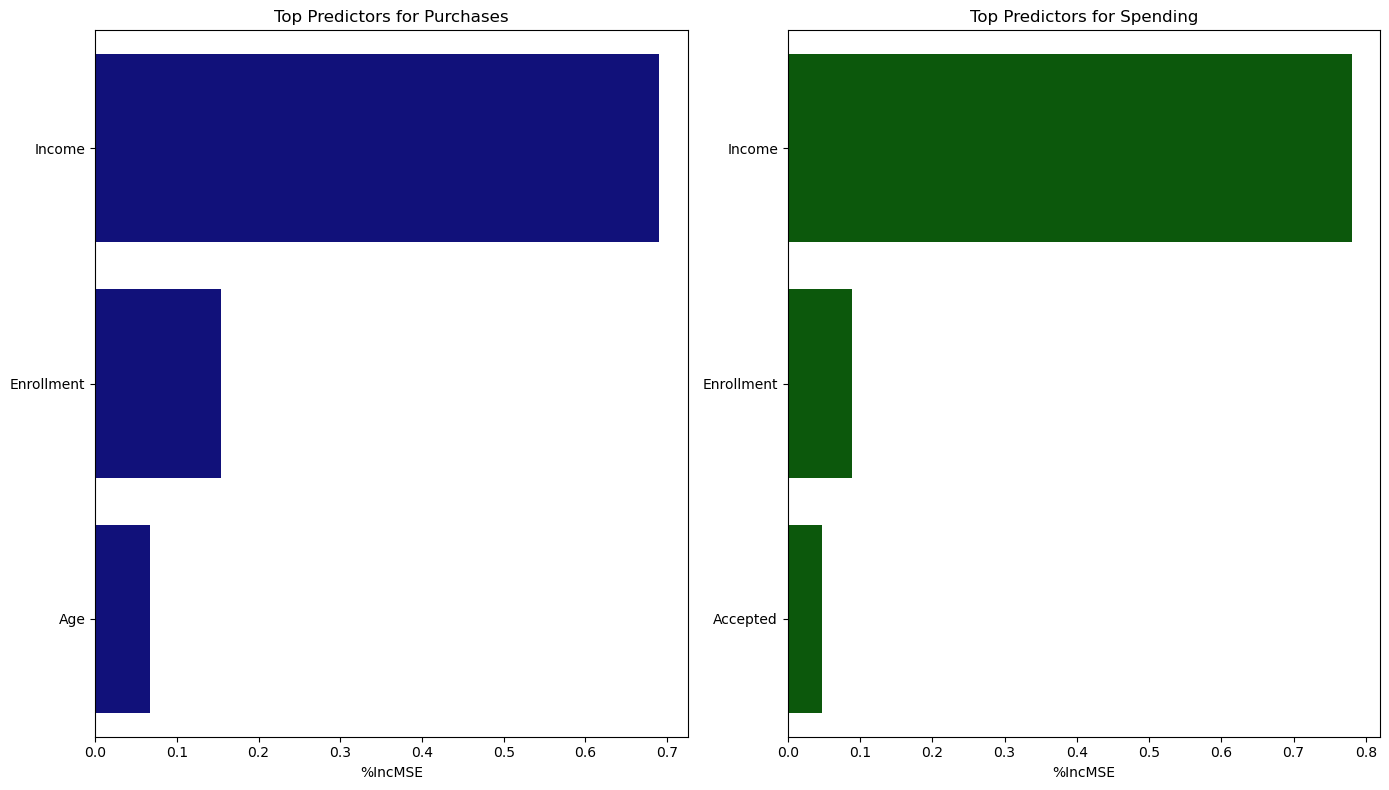

In [127]:
# Select predictor variables
predictors_cols = [
    "Education", "Income", "Complain", "Response",
    "Enrollment", "Age", "Living_Status", "Family_Size", "Accepted"
]

# Create separate dataframes for target variables
data_clean_purchases = df_cleaned[predictors_cols].copy()
data_clean_purchases["Total_Purchases"] = df_cleaned["Total_Purchases"]

data_clean_spending = df_cleaned[predictors_cols].copy()
data_clean_spending["Total_Spending"] = df_cleaned["Total_Spending"]

# Categorical variables to encode
categorical_features = ["Education", "Living_Status"]
numerical_features = [col for col in predictors_cols if col not in categorical_features]

# Define the preprocessing and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Purchases model
pipeline_purchases = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline_purchases.fit(data_clean_purchases[predictors_cols], data_clean_purchases["Total_Purchases"])

# Spending model
pipeline_spending = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline_spending.fit(data_clean_spending[predictors_cols], data_clean_spending["Total_Spending"])

# Get feature importances and feature names
def get_importance_df(pipeline, predictors, top_n=3):
    rf = pipeline.named_steps["rf"]
    ohe = pipeline.named_steps["preprocessor"].named_transformers_["cat"]
    cat_feature_names = ohe.get_feature_names_out(categorical_features)
    all_features = list(cat_feature_names) + numerical_features
    importances = rf.feature_importances_
    imp_df = pd.DataFrame({"Variable": all_features, "IncMSE": importances})
    imp_df = imp_df.sort_values("IncMSE", ascending=False).head(top_n)
    return imp_df

imp_pur_df = get_importance_df(pipeline_purchases, predictors_cols)
imp_spend_df = get_importance_df(pipeline_spending, predictors_cols)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.barplot(data=imp_pur_df, x="IncMSE", y="Variable", ax=axes[0], color="darkblue")
axes[0].set_title("Top Predictors for Purchases")
axes[0].set_xlabel("%IncMSE")
axes[0].set_ylabel("")

sns.barplot(data=imp_spend_df, x="IncMSE", y="Variable", ax=axes[1], color="darkgreen")
axes[1].set_title("Top Predictors for Spending")
axes[1].set_xlabel("%IncMSE")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Top four variables sorted by %IncMSE for customer spending and purchases are: `Income`, `Enrollment`, `Accepted`, and `Age`. Therefore, we can assume that these three predictors are the ones that affect customer purchasing behavior the most. In other words, an individual's income, how long the individual has enrolled with the company, their acceptance rate to offers, and their age would largely determine one's purchasing and spending behaviors. Moreover, **`Income` seems to dominate both customer spending and purchase** due to its significantly high percent increase in Mean Squared Error (over 150) when comparing to the other features (they all have %IncMSE less than 75).

Next, we can visualize the relationships between the numeric variables throughout a heatmap, which can help validate our findings from Random Forest.

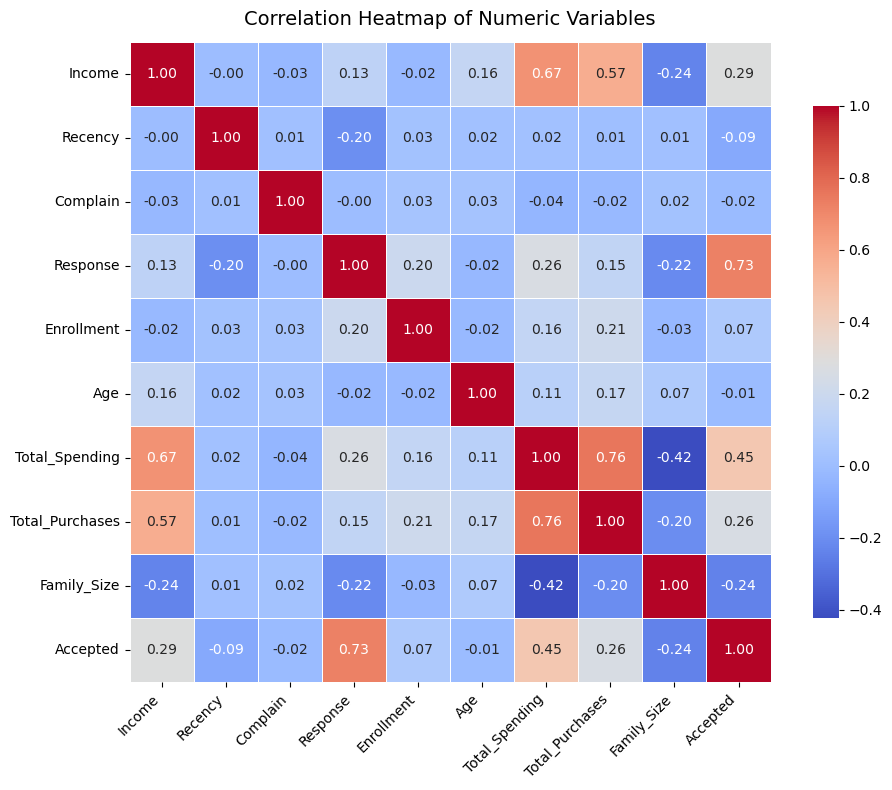

In [131]:
# Select numeric variables
numeric_cols = [
    "Income", "Recency", "Complain", "Response", "Enrollment",
    "Age", "Total_Spending", "Total_Purchases", "Family_Size", "Accepted"
]
numeric_data = df_cleaned[numeric_cols]

# Compute correlation matrix
cor_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cor_matrix, annot=True, fmt=".2f", cmap="coolwarm",
    square=True, linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


From the heatmap, we can see that `Income` is highly correlated with `Total_Spending` (r=0.67) and `Total_Purchases` (r=0.57). This confirms our key observation from Random Forest, which declares income as the dominant feature for total purchases and spending. 

### Linear Regression

Now, we move on to see how much each purchase channel contributes to total spending and total purchases. We will fit a linear model to quantify channel-specific contributions to spending. 

In [137]:
X = df_cleaned[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]]
y = df_cleaned["Total_Spending"]

# Add intercept term
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Display model summary
summary_df = model.summary2().tables[1].round(3)
summary_df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-168.338,14.443,-11.655,0.0,-196.661,-140.015
NumWebPurchases,33.902,2.895,11.712,0.0,28.226,39.579
NumCatalogPurchases,116.088,2.714,42.773,0.0,110.765,121.410
NumStorePurchases,56.342,2.631,21.415,0.0,51.182,61.501


Predictor `NumCatalogPurchases` has the largest slope (116.088), indicating that **customers tend to spend more money while shopping using a catalog**. Now we use visualization to look at the distribution of purchases through different channels. 

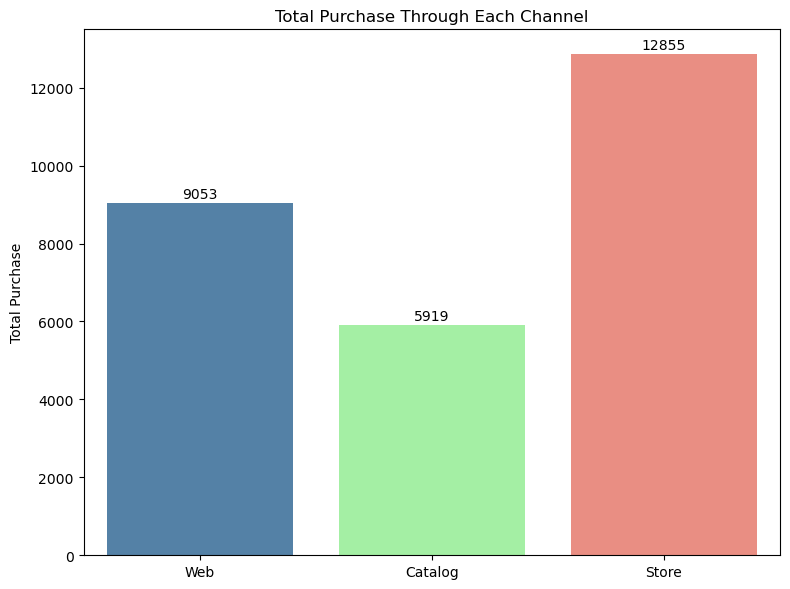

In [146]:
# Summarize total purchases by channel
channel_purchases = pd.DataFrame({
    "Channel": ["Web", "Catalog", "Store"],
    "Purchases": [
        df_cleaned["NumWebPurchases"].sum(),
        df_cleaned["NumCatalogPurchases"].sum(),
        df_cleaned["NumStorePurchases"].sum()
    ]
})

# Plot
plt.figure(figsize=(8, 6))
palette_dict = {"Web": "steelblue", "Catalog": "palegreen", "Store": "salmon"}
sns.barplot(data=channel_purchases, x="Channel", y="Purchases", hue="Channel",
            palette=palette_dict, dodge=False, legend=False)

# Add value labels
for index, row in channel_purchases.iterrows():
    plt.text(index, row["Purchases"] + 50, round(row["Purchases"], 0), 
             ha='center', va='bottom', fontsize=10)

plt.title("Total Purchase Through Each Channel")
plt.ylabel("Total Purchase")
plt.xlabel("")
plt.tight_layout()
plt.show()

Interestingly, looking at this bar plot, **purchases made at store seem to account for the most purchases**. Although catalog purchases have the highest spending per transaction, store purchases dominate total transaction volume.

### Clustering

Next, we move on to exploring whether customers can be grouped into distinct segments based on their personalities and behaviors. We will be start with Model-Based Clustering with Gaussian Mixture Model (GMM), which is a probabilistic model that accommodates clusters of varying shapes and sizes. 

In [167]:
# Fit GMM for clusters G = 2 to 5 and choose best by BIC
predictors_data = df_cleaned[predictors_cols].copy()

lowest_bic = np.inf
best_gmm = None
for g in range(2, 6):
    gmm = GaussianMixture(n_components=g, random_state=123)
    gmm.fit(scaled_data)
    bic = gmm.bic(scaled_data)
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm = gmm

# Predict cluster labels
gmm_labels = best_gmm.predict(scaled_data)

# Add GMM cluster assignments to predictors_data
predictors_data["GMMCluster"] = gmm_labels.astype(str)  # to mimic R's factor

# Compute silhouette score
sil_gmm_mean = silhouette_score(scaled_data, gmm_labels)

print(f"Silhouette Coefficient for Model-Based Clustering (GMM) = {sil_gmm_mean:.3}.")

Silhouette Coefficient for Model-Based Clustering (GMM) = 0.0794.


We can see that Gaussian Mixture clustering gives us a very weak Silhouette Coefficients of 0.063, indicating bad clustering. This result suggests that clustering **might not be appropriate** for this dataset, and customers **cannot be grouped** into distinct segments based on their personalities and behaviors. Instead, customer traits are better understood as continuous variables rather than discrete segments. 

Next, we try Hierarchical Clustering with Gower Distance to see if we get similar results. Using Gower distance, we will be able to handles mixed data types.

/var/folders/_l/1l_5r6kd1dg8c_7tp_qcphhh0000gn/T/ipykernel_92557/289718998.py:14: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method="ward")


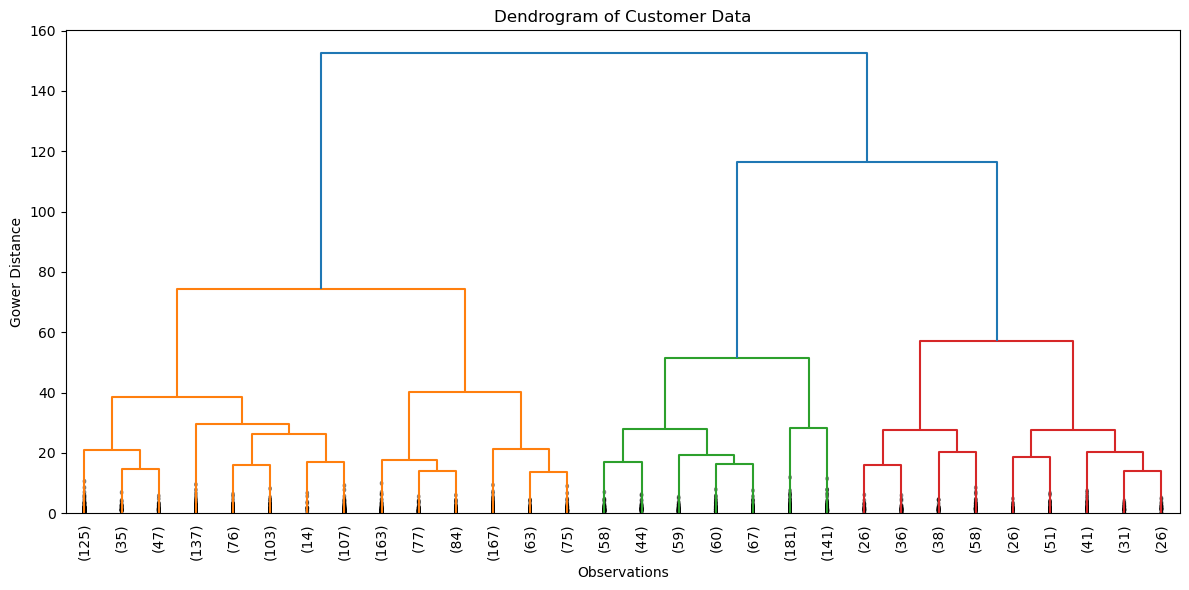

In [179]:
clustering_data = df_cleaned[[
    "Income", "Recency", "Complain", "Age", "Enrollment", "Total_Spending",
    "Total_Purchases", "Family_Size", "Education", "Living_Status", "Accepted", "Response"
]].copy()

# Convert categorical columns to string (not CategoricalDtype)
clustering_data["Education"] = clustering_data["Education"].astype(str)
clustering_data["Living_Status"] = clustering_data["Living_Status"].astype(str)

# Compute Gower distance matrix
gower_dist = gower.gower_matrix(clustering_data)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(gower_dist, method="ward")

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30, leaf_rotation=90,
           leaf_font_size=10, show_contracted=True)
plt.title("Dendrogram of Customer Data")
plt.xlabel("Observations")
plt.ylabel("Gower Distance")
plt.tight_layout()
plt.show()

In [184]:
# Cut the dendrogram into 3 clusters
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Assign clusters back to the data
clustering_data["Cluster"] = cluster_labels

# Compute silhouette score
sil_score = silhouette_score(gower_dist, cluster_labels, metric='precomputed')

# Create summary table
clustering_table = pd.DataFrame({
    "Method": ["Hierarchical Clustering"],
    "Silhouette Coefficient": [round(sil_score, 3)],
    "Number of Clusters": [3]
})

print(f"Silhouette Coefficient for Hierarchical Clustering (Gower Distance) = {sil_score:.3}.")

Silhouette Coefficient for Hierarchical Clustering (Gower Distance) = 0.309.


Using Hierarchical Clustering, we got a Silhouette Scores of 0.299 (3 clusters), which is much better than the score we got from using Gaussian Mixture, although still being unsatisfactorily low. Let's explore the traits of each cluster.

In [198]:
# Add cluster labels to the original dataframe
df_cleaned["Cluster"] = cluster_labels

# Group by Cluster and compute summary statistics
cluster_summary = df_cleaned.groupby("Cluster").agg({
    "Income": "mean",
    "Total_Spending": "mean",
    "Enrollment": "mean",
    "NumCatalogPurchases": "mean",
    "ID": "count"  # use ID or any column to count rows
}).rename(columns={
    "Income": "Avg Income",
    "Total_Spending": "Avg Spending",
    "Enrollment": "Avg Enrollment Time",
    "NumCatalogPurchases": "Catalog Purchases",
    "ID": "Number of Customers"
}).reset_index()

# Round for display
cluster_summary = cluster_summary.round(2)

cluster_summary

,Cluster,Avg Income,Avg Spending,Avg Enrollment Time,Catalog Purchases,Number of Customers
0,1,51438.26,550.14,3810.67,2.44,1273
1,2,49588.83,519.22,3804.89,2.31,610
2,3,60209.68,985.66,3920.08,4.20,333


We can see from this printed summary that cluster 3 has a higher average income, average spending, and catalog purchases than clusters 1 and 2. The three clusters have similar average enrollment time, while cluster 1 has the largest population. 

## Discussion

PCA revealed high intrinsic dimensionality in the data, requiring 9 principal components to explain at least 70% of the variance. The absence of an ideal "elbow" in the scree plot suggests no dominant linear relationships, limiting the utility of PCA. Random Forest identified income as the strongest predictor of both total purchases (%IncMSE over 150) and spending (%IncMSE over 150). The heatmap confirmed this finding by showing a strong correlation between income and total spending (r = 0.72) and between income and total purchase (r = 0.68). Other strong predictors pointed out by Random Forest include enrollment lengths, offer acceptance rate, and customer age. Moreover, among the three purchase channels, catalog purchases yield the highest spending, possibly due to product offerings, while store purchases contribute to the majority of transactions, highlighting high customer demand for in-store purchases and the need for in-store promotions. Lastly, the low Silhouette scores we got from conducting Gaussian Mixture Model clustering (Silhouette Score = 0.063) indicate no meaningful customer segments. However, Hierarchical Clustering with Gower Distance did a better job at clustering (Silhouette Score = 0.299). This difference might be introduced due to the fact that Gower distance accommodates mixed data types. Nevertheless, both clustering methods indicate limitations in segmenting customers, directing against discrete grouping in favor of continuous trait analysis.

## Conclusion

This project analyzed 2,240 customer records to identify key drivers of purchasing behavior and campaign engagement. It highlights three insights: 

First, four traits dominate purchasing behavior: income, enrollment duration, offer acceptance, and customer age are dominant predictors of customer behavior. Therefore, marketing strategies can consider prioritizing personalized campaigns based on these variables.

Second, catalog purchases maximize revenue, while store purchases drive purchase frequency. Different strategies can be used to allocate resources to catalog promotions for high-income customers and in-store promotions for broader audiences.

Lastly, segmentation of customers is limited. Both clustering methods produced relatively weak groups by giving low Silhouette Scores.